In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv.euler_solver import EulerSolver
import superfv.initial_conditions as ic
from teyssier import weno, cons_to_prim

N = 100
p = 3
T = 0.245

In [2]:
ut = weno(
    tend=T,
    n=N,
    cfl=0.8,
    ic_type="sod test",
    bc_type="free",
    riemann_solver="llf",
    time=p + 1,
    space=p + 1,
)

solver = EulerSolver(
    nx=N,
    CFL=0.8,
    ic=ic.sod_shock_tube_1d,
    bcx="free",
    riemann_solver="llf",
    p=p,
    flux_recipe=3,
    lazy_primitives=True,
    ZS=True,
    adaptive_timestepping=False,
    SED=True,
)
solver.run(T, allow_overshoot=True)

cell= 100  itermax= 100000
Done  67 0.24806806010184204


100%|█████████▉| 0.24444203087760985/0.245 [00:00] /Users/jonathan/miniconda3/envs/superfv/lib/python3.12/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
101%|██████████| 0.2480680601018415/0.245 [00:00] /Users/jonathan/miniconda3/envs/superfv/lib/python3.12/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
101%|██████████| 0.2480680601018415/0.245 [00:00]


Text(0.5, 0, '$x$')

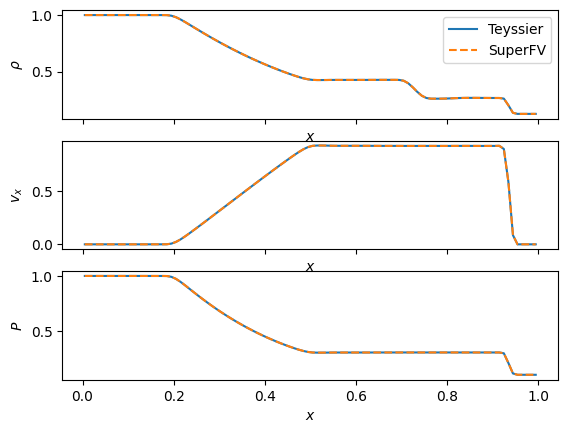

In [3]:
fig, axs = plt.subplots(3, 1, sharex=True)

x = (np.arange(ut.shape[2]) + 0.5) / ut.shape[2]
wt = cons_to_prim(ut[-1, :, :])

axs[0].set_ylabel(r"$\rho$")
axs[0].plot(x, wt[0, :], label="Teyssier")
solver.plot_1d_slice(
    axs[0],
    variable="rho",
    array="w",
    x=None,
    t=solver.t,
    label="SuperFV",
    linestyle="--",
)

axs[1].set_ylabel(r"$v_x$")
axs[1].plot(x, wt[1, :], label="Teyssier")
solver.plot_1d_slice(
    axs[1],
    variable="vx",
    array="w",
    x=None,
    t=solver.t,
    label="SuperFV",
    linestyle="--",
)

axs[2].set_ylabel(r"$P$")
axs[2].plot(x, wt[2, :], label="Teyssier")
solver.plot_1d_slice(
    axs[2],
    variable="P",
    array="w",
    x=None,
    t=solver.t,
    label="SuperFV",
    linestyle="--",
)

axs[0].legend()
axs[2].set_xlabel(r"$x$")